In [745]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Read csv file
cases = pd.read_csv("311_Cases.csv", sep = ",", dtype = "str")

# Drop extra columns
cases = cases.drop(cases.columns[range(20,47)], axis = 1)



####### Date Columns #####
#date_columns = ["Opened", "Closed", "Updated"]

# Convert specified columns into datetime format
cases[date_columns] = cases[date_columns].apply(pd.to_datetime, format = "%m/%d/%Y %I:%M:%S %p", errors = 'coerce')
#"%m/%d/%Y %H:%M"
#"%m/%d/%Y %I:%M:%S %p"

# Find Closed - Opened in hours
time_elapsed = (cases["Closed"] - cases["Opened"])/np.timedelta64(1, 'h')

# Insert Time Elapsed into cases df
cases.insert(3, "Time Elapsed", time_elapsed)
cases
#cases

,CaseID,Opened,Closed,Time Elapsed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,...,Address,Street,Supervisor District,Neighborhood,Police District,Latitude,Longitude,Point,Source,Media URL
0,10622276,2019-03-19 16:44:32,NaT,NaN,2020-08-28 01:31:06,Open,accepted,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,...,"361 MISSISSIPPI ST, SAN FRANCISCO, CA, 94107",MISSISSIPPI ST,10,Potrero Hill,BAYVIEW,37.76156,-122.394172,"(37.76156, -122.394172)",Web,NaN
1,10704816,2019-04-09 07:08:53,NaT,NaN,2020-08-28 01:31:03,Open,accepted,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,...,"1407 GOUGH ST, SAN FRANCISCO, CA, 94109",GOUGH ST,5,Cathedral Hill,NORTHERN,37.786767,-122.425109,"(37.786767, -122.425109)",Mobile/Open311,NaN
2,10892486,2019-05-21 16:11:00,2020-08-28 07:46:00,11151.583333,2020-08-28 07:46:00,Closed,Case Resolved - Loose PG&E vault doors and sun...,DPW BSM Queue,Sidewalk or Curb,Sidewalk_Defect,...,Intersection of CARL ST and COLE ST,CARL ST,5,Cole Valley,PARK,37.765800476074,-122.44995880127,"(37.76580048, -122.4499588)",Phone,NaN
3,11866528,2019-12-27 12:09:00,2020-01-08 21:30:13,297.353611,2020-01-08 21:30:13,Closed,Case Resolved - Per process - cases are closed...,Clear Channel - Transit Queue,Street and Sidewalk Cleaning,Transit_shelter_platform,...,Intersection of MARKET ST and DRUMM ST,MARKET ST,3,Financial District,CENTRAL,37.793254852295,-122.396301269531,"(37.79325485, -122.39630127)",Phone,NaN
4,10650674,2019-03-26 20:26:28,NaT,NaN,2020-07-15 01:25:53,Open,accepted,DPW - Bureau of Street Use and Mapping - G,General Request - PUBLIC WORKS,request_for_service,...,"868 FOLSOM ST, SAN FRANCISCO, CA, 94107",FOLSOM ST,6,South of Market,SOUTHERN,37.780902862549,-122.402801513672,"(37.78090286, -122.40280151)",Integrated Agency,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
888851,494144,2009-08-26 15:59:01,2009-11-16 14:01:11,1966.036111,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888852,"""error"" : true",NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888853,"""message"" : ""Internal error""",NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
888854,"""status"" : 500",NaT,NaT,NaN,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [746]:
#Q4. Predict how long it takes for cases to be closed based on category of case
cases_q4 = cases.drop(cases.columns[range(11,20)], axis = 1)
cases_q4 = cases_q4.drop(['CaseID', 'Status Notes', 'Responsible Agency', 'Request Details', 'Media URL', 'Request Type', 'Closed', 'Opened', 'Updated', 'Status'], axis = 1)


In [747]:
#Get dummies
category = pd.get_dummies(cases_q4['Category'],drop_first=True)
cases_q4 = pd.concat([cases_q4,category,request],axis=1)
cases_q4 = cases_q4.drop(['Category'], axis = 1)
cases_q4.dropna()

,Time Elapsed,Abandoned Vehicle,Blocked Street or SideWalk,Catch Basin Maintenance,Color Curb,Construction Zone Permits,DPW Volunteer Programs,Damaged Property,Encampments,General Request -,...,Streetlight - Light_Flickering_On_Off,Streetlight - Other,Transit_shelter_platform,Trees - Damaged_Tree,Trees - Damaging_Property,Trees - Overgrown_Tree,Trees - Tree_Other,complaint,other,request_for_service
5,3358.268333,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,2.875833,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,10.144722,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,3357.356667,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
12,0.900000,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,8.601111,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,7.350556,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992,4.950000,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1994,20.151111,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [748]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from pandas import Series
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import math

In [749]:
X = cases_q4.loc[:,cases_q4.columns != 'Time Elapsed']
y = cases_q4['Time Elapsed']

In [750]:
#Splitting data into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [752]:
#Fitting a Ridge Model
modelRidge = Ridge(normalize = True)
modelRidge.fit(X_train,y_train)
predRidge = modelRidge.predict(X_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(X_train, y_train))
print('Test accuracy:', modelRidge.score(X_test, y_test))
print('')

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

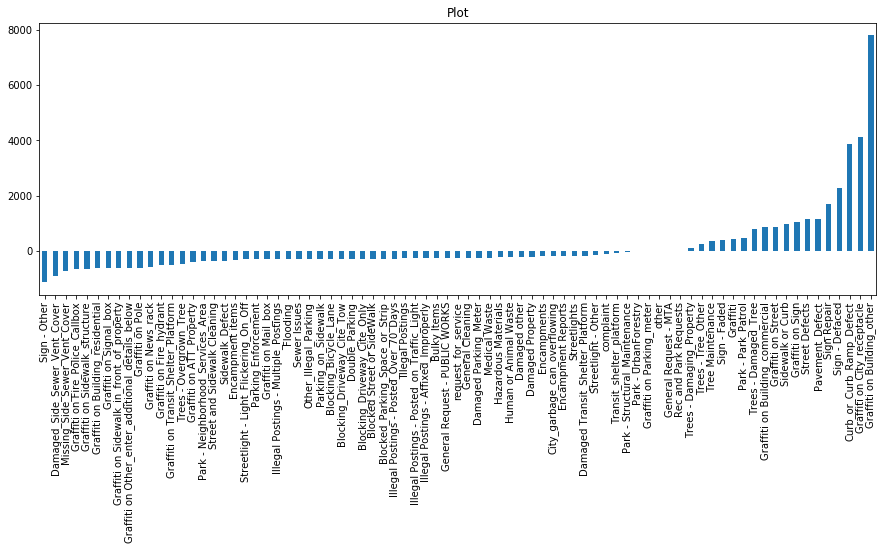

In [418]:
#Plot of variables vs coefficients
predictors = X_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plt.figure(figsize=(15,5))
plot = coef.plot(kind='bar', title = 'Plot')

In [ ]:
#Fitting a Ridge Model with box-cox

modelRidge = Ridge(normalize = True)
modelRidge.fit(X_train,y_train)
predRidge = modelRidge.predict(X_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(X_train, y_train))
print('Test accuracy:', modelRidge.score(X_test, y_test))
print('')

In [358]:
#Fitting a Lasso model
modelLasso = Lasso()
modelLasso.fit(X_train,y_train)
predLasso = modelLasso.predict(X_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(X_train, y_train))
print('Test accuracy:', modelLasso.score(X_test, y_test))
print('')

Coefficient of each feature: [   -0.            -0.             0.             0.
   -92.06925632     0.          -180.49702884  -248.96599377
    94.07411106    -0.           166.78593529  2401.21859214
  3487.13775154  -215.60297684     0.          1119.61938523
    -0.            -0.            -0.            -0.
   -25.84829321    38.64754379  8922.9370107     -0.
     0.            -0.            -0.            -0.
    24.2227826   -130.59798581    -0.            -0.
     0.          2712.55024785 16426.92833172  -127.20914648
  9124.64508712    -0.             0.           396.80126614
    -0.          -157.16837947     0.           -52.16951808
   -68.49853274    -0.          2372.80005322  -162.05052747
  2595.13721461     0.            -0.            -0.
    -0.            -0.            -0.            -0.
    -0.            -0.            -0.          -152.0225716
  1320.57763599   279.1995341      0.            -0.
   478.17038472   591.55902423  4332.23892933     0.
 -2161.

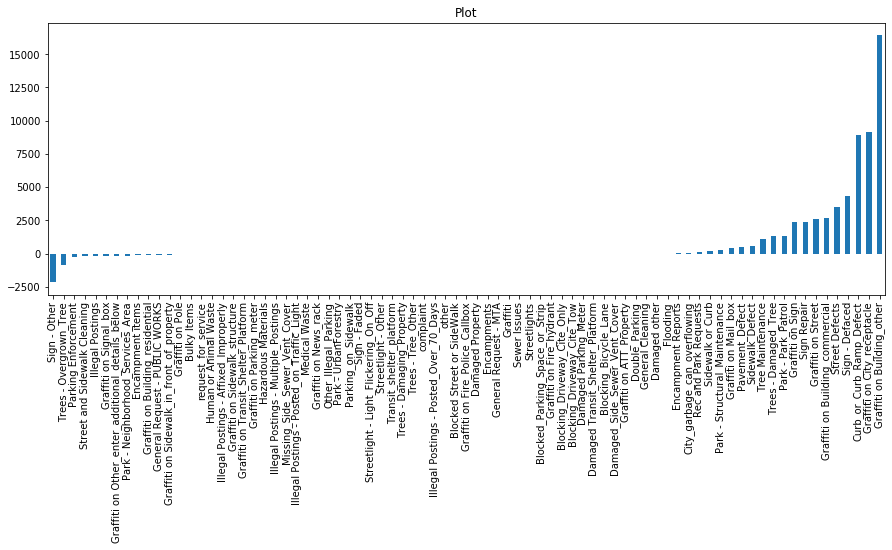

In [368]:
#Plot of variables vs coefficients
predictors = X_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plt.figure(figsize=(15,5))
plot = coef.plot(kind='bar', title = 'Plot')

In [ ]:
#Fitting a box-cox of Lasso

In [781]:
#cases_q7 = cases.drop(cases.columns[range(15,20)], axis = 1)
#cases_q7 = cases_q7.drop(cases.columns[range(1,14)], axis = 1)
#cases_q7 = cases_q7.drop(['Media URL', 'CaseID'], axis = 1)
cases_q7 = pd.DataFrame(cases['Neighborhood'])
cases_q7 = cases_q7.dropna()
cases_q7

,Neighborhood
0,Potrero Hill
1,Cathedral Hill
2,Cole Valley
3,Financial District
4,South of Market
...,...
888843,Sunnyside
888844,Eureka Valley
888846,Sunnyside
888847,Cole Valley


In [782]:
#grouping by neighborhood and obtaining frequency

cases_q7['freq'] = 1
neighborhood = cases_q7.groupby('Neighborhood').sum()['freq']
neighborhood = pd.DataFrame(neighborhood)
neighborhood = neighborhood.rename_axis("Neighborhood").reset_index()

In [783]:
#reading a csv file of household income and population
#from census.gov and niche.com
IncPop = pd.read_csv("Neighborhood.csv")
IncPop

#Combining both dataframes
neighborhood = pd.merge(neighborhood, IncPop, on = ["Neighborhood"])
neighborhood

,Neighborhood,freq,Income,Population
0,Alamo Square,3939,239545,14570
1,Anza Vista,1544,114431,3064
2,Apparel City,2946,47826,2450
3,Aquatic Park / Ft. Mason,1059,143693,3775
4,Aquatic Park / Ft. Mason,1059,143693,3775
...,...,...,...,...
106,West Portal,2294,170018,5753
107,Western Addition,11844,87765,20459
108,Westwood Highlands,249,182188,872
109,Westwood Park,1116,131653,5214


In [784]:
#I found th ranges by finding the quartiles of the population and income
#The lowest is zero and the highest in the range is the highest value in the dataset
#The second bin is quartile 1 and the third bin is the median
neighborhood['Pop Levels']  = pd.cut(neighborhood['Population'], bins=[0, 4466.4, 7794.5, 61736], include_lowest=True, labels=['low', 'mid', 'high'])
#CHECK VALS AGAIN
neighborhood['Income Levels']  = pd.cut(neighborhood['Income'], bins=[0, 91035, 129978.5, 239545], include_lowest=True, labels=['low', 'mid', 'high'])
neighborhood

,Neighborhood,freq,Income,Population,Pop Levels,Income Levels
0,Alamo Square,3939,239545,14570,high,high
1,Anza Vista,1544,114431,3064,low,mid
2,Apparel City,2946,47826,2450,low,low
3,Aquatic Park / Ft. Mason,1059,143693,3775,low,high
4,Aquatic Park / Ft. Mason,1059,143693,3775,low,high
...,...,...,...,...,...,...
106,West Portal,2294,170018,5753,mid,high
107,Western Addition,11844,87765,20459,high,low
108,Westwood Highlands,249,182188,872,low,high
109,Westwood Park,1116,131653,5214,mid,high


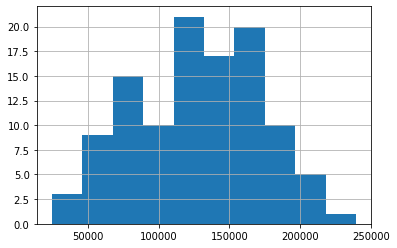

In [785]:
inc = neighborhood['Income'].hist()


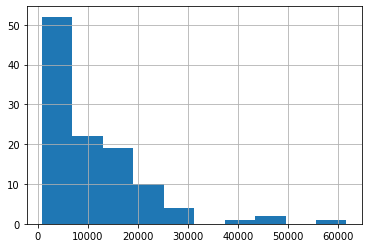

In [767]:
neighborhood['Population'].hist()

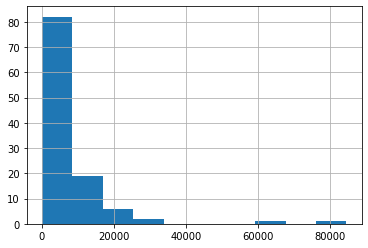

In [766]:
neighborhood['freq'].hist()

In [786]:
#PCA of Income and frequency
df = neighborhood
neighborhood['target'] = neighborhood['Income Levels']
features = ['Income', 'freq']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [787]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) ## transforming the data into PC coordinates.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,-1.919004,1.507552
1,-0.153037,-0.570110
2,0.961280,-1.501965
3,-0.634076,-0.152191
4,-0.634076,-0.152191
...,...,...
106,-0.958078,0.332538
107,0.926809,-0.309470
108,-1.278087,0.386403
109,-0.445427,-0.333422


In [788]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,-1.919004,1.507552,high
1,-0.153037,-0.570110,mid
2,0.961280,-1.501965,low
3,-0.634076,-0.152191,high
4,-0.634076,-0.152191,high
...,...,...,...
106,-0.958078,0.332538,high
107,0.926809,-0.309470,low
108,-1.278087,0.386403,high
109,-0.445427,-0.333422,high


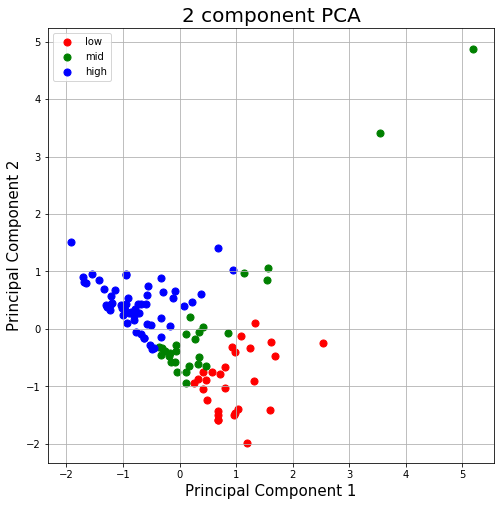

In [789]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'mid', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [794]:
#Building pca plot after training and testing data

Xinc = pd.DataFrame(neighborhood[['Income', 'freq']])
y = neighborhood['Income Levels']

Xinc_train, Xinc_test, y_train, y_test = train_test_split(Xinc, y, test_size = 0.3, random_state = 0)

In [795]:
sc = StandardScaler()
Xinc_train = sc.fit_transform(Xinc_train)
Xinc_test = sc.transform(Xinc_test)

pca = PCA()
Xinc_train = pca.fit_transform(Xinc_train)
Xinc_test = pca.transform(Xinc_test)

In [796]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.62732165, 0.37267835])

In [797]:
pca = PCA(n_components=1)
Xinc_train = pca.fit_transform(Xinc_train)
Xinc_test = pca.transform(Xinc_test)

In [798]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)
classifier.fit(Xinc_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(Xinc_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[12  3  2]
 [ 0  8  0]
 [ 1  6  2]]
Accuracy: 0.6470588235294118


In [799]:
#Building Ridge Regression plots for frequency and income

Xinc = pd.DataFrame(neighborhood['Income'])
y = neighborhood['freq']

Xinc_train, Xinc_test, y_train, y_test = train_test_split(Xinc, y, test_size = 0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge(normalize = True)
modelRidge.fit(Xinc_train,y_train)
predRidge = modelRidge.predict(Xinc_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xinc_train, y_train))
print('Test accuracy:', modelRidge.score(Xinc_test, y_test))
print('')


Coefficient of each feature: [-0.01841681]
Training accuracy: 0.04863241124006257
Test accuracy: -0.06020216046774696



In [633]:
#Looking at the accuracy


In [800]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(Xinc_train,y_train)
predLasso = modelLasso.predict(Xinc_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(Xinc_train, y_train))
print('Test accuracy:', modelLasso.score(Xinc_test, y_test))
print('')

Coefficient of each feature: [-0.03683361]
Training accuracy: 0.0648432149867505
Test accuracy: -0.05813296685536007



In [801]:
#PCA of Population and frequency
df = neighborhood
neighborhood['target'] = neighborhood['Pop Levels']
features = ['Population', 'freq']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [802]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x) ## transforming the data into PC coordinates.
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,0.018096,-0.429548
1,-0.935350,0.212203
2,-0.886681,0.345996
3,-0.917623,0.131356
4,-0.917623,0.131356
...,...,...
106,-0.700144,0.074605
107,0.940718,-0.323379
108,-1.171568,0.279884
109,-0.814163,0.035313


In [803]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)
finalDf

,principal component 1,principal component 2,target
0,0.018096,-0.429548,high
1,-0.935350,0.212203,low
2,-0.886681,0.345996,low
3,-0.917623,0.131356,low
4,-0.917623,0.131356,low
...,...,...,...
106,-0.700144,0.074605,mid
107,0.940718,-0.323379,high
108,-1.171568,0.279884,low
109,-0.814163,0.035313,mid


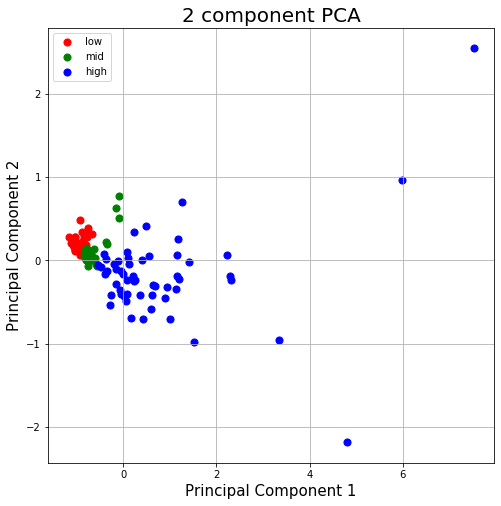

In [804]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['low', 'mid', 'high']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [805]:
#Building pca plot after training and testing data

Xpop = pd.DataFrame(neighborhood[['Population', 'freq']])
y = neighborhood['Pop Levels']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size = 0.3, random_state = 0)


In [806]:
sc = StandardScaler()
Xpop_train = sc.fit_transform(Xpop_train)
Xpop_test = sc.transform(Xpop_test)

pca = PCA()
Xpop_train = pca.fit_transform(Xpop_train)
Xpop_test = pca.transform(Xpop_test)

In [807]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.9272112, 0.0727888])

In [808]:
pca = PCA(n_components=1)
Xpop_train = pd.DataFrame(pca.fit_transform(Xpop_train)).dropna()
Xpop_test = pca.transform(Xpop_test)

In [810]:
classifier = RandomForestClassifier(max_depth=2, random_state=0)

Xpop_train = pd.DataFrame(Xpop_train).dropna()
classifier.fit(Xpop_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(Xpop_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy: ' + str(accuracy_score(y_test, y_pred)))

[[20  0  0]
 [ 0  3  2]
 [ 2  1  6]]
Accuracy: 0.8529411764705882


In [811]:
#Building Ridge Regression plots for frequency and population

Xpop = pd.DataFrame(neighborhood['Population'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(Xpop_train,y_train)
predRidge = modelRidge.predict(Xpop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xpop_train, y_train))
print('Test accuracy:', modelRidge.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [0.59449132]
Training accuracy: 0.730037645821333
Test accuracy: 0.4931049416789572



In [812]:
neighborhood['logPop'] = np.log(neighborhood['Population'])
Xpop = pd.DataFrame(neighborhood['logPop'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(Xpop_train,y_train)
predRidge = modelRidge.predict(Xpop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xpop_train, y_train))
print('Test accuracy:', modelRidge.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [6031.76753387]
Training accuracy: 0.5723009333613882
Test accuracy: 0.2530329789130781



In [813]:
#log did worse so log10
neighborhood['expPop'] = np.sqrt(neighborhood['Population'])
Xpop = pd.DataFrame(neighborhood['expPop'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(Xpop_train,y_train)
predRidge = modelRidge.predict(Xpop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(Xpop_train, y_train))
print('Test accuracy:', modelRidge.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [142.04959684]
Training accuracy: 0.7106989572315088
Test accuracy: 0.3956854803935278



In [814]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(Xpop_train,y_train)
predLasso = modelLasso.predict(Xpop_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(Xpop_train, y_train))
print('Test accuracy:', modelLasso.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [142.05012461]
Training accuracy: 0.7106989572645439
Test accuracy: 0.3956866188161854



In [815]:
neighborhood['logPop'] = np.log(neighborhood['Population'])
Xpop = pd.DataFrame(neighborhood['logPop'])
y = neighborhood['freq']

Xpop_train, Xpop_test, y_train, y_test = train_test_split(Xpop, y, test_size=0.3, random_state = 0)
modelLasso = Lasso()
modelLasso.fit(Xpop_train,y_train)
predLasso = modelLasso.predict(Xpop_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(Xpop_train, y_train))
print('Test accuracy:', modelLasso.score(Xpop_test, y_test))
print('')

Coefficient of each feature: [6144.01979814]
Training accuracy: 0.5724968817811017
Test accuracy: 0.25709703127779937



In [ ]:
#pca plot for the best transformation of regression
#income


In [816]:
#Building Ridge Regression plots for frequency vs population and income
XIncPop = neighborhood[['Income', 'Population']]
y = neighborhood['freq']
XIncPop_train, XIncPop_test, y_train, y_test = train_test_split(XIncPop, y, test_size=0.3, random_state = 0)

#Fitting a Ridge Model
modelRidge = Ridge()
modelRidge.fit(XIncPop_train,y_train)
predRidge = modelRidge.predict(XIncPop_test)
print('Coefficient of each feature:', modelRidge.coef_)
print('Training accuracy:', modelRidge.score(XIncPop_train, y_train))
print('Test accuracy:', modelRidge.score(XIncPop_test, y_test))
print('')


Coefficient of each feature: [-0.01187791  0.58272149]
Training accuracy: 0.7364945357698012
Test accuracy: 0.4897922954830378



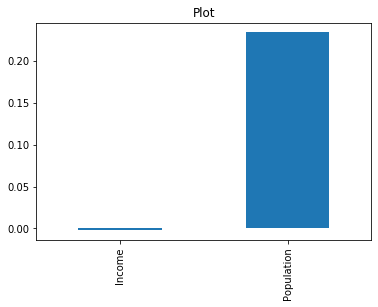

In [650]:
#Plot of variables vs coefficients
predictors = XIncPop_train.columns
coef = Series(modelRidge.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [817]:
#Fitting a Lasso Model
modelLasso = Lasso()
modelLasso.fit(XIncPop_train,y_train)
predLasso = modelLasso.predict(XIncPop_test)
print('Coefficient of each feature:', modelLasso.coef_)
print('Training accuracy:', modelLasso.score(XIncPop_train, y_train))
print('Test accuracy:', modelLasso.score(XIncPop_test, y_test))
print('')

Coefficient of each feature: [-0.01187791  0.58272148]
Training accuracy: 0.736494535769801
Test accuracy: 0.4897922884139182



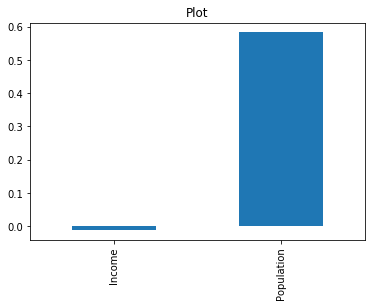

In [818]:
#Plot of variables vs coefficients
predictors = XIncPop_train.columns
coef = Series(modelLasso.coef_,predictors).sort_values()
plot = coef.plot(kind='bar', title = 'Plot')

In [ ]:
#Split data into low, medium, high income and pop levels and plot pca
#freq and income, freq and pop, then freq and income + pop